In [1]:
from scipy import stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Тема: поиск закономерностей определяющий успех популярности компьютеных игр

## Изучение данных из файла

Откроем и сохраним в переменную data наш датасет:

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Выведем информацию о нашем датасете:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Выведем на экраан количесвто пропусков в каждом столбце:

In [4]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

### Вывод

В изученой таблице пристутсвует 11 столбцов и 16715 заполненных строк.
Согласно  сопроводительной докумендации к данным:

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

В датасете присутсвуют следущие моменты:

1) В столбцах `Name`, `Year_of_Release`, `Critic_Score`, `User_Score`, `Rating` пристуствуют пропуски

2) В столбце `Year_of_Release` тип данных float, коректнее будет его изменить на int

3) В столбце `User_Score` тип данных object, коректнее будет его изменить на float.

4) Название столбцов следует привести к нижнему регистру


## Предобработка данных

### Форматирование названия солбцов

Привидем название столбцов к нижнему регистру:

In [5]:
data.columns = data.columns.str.lower() #приидем название столбцов к нижнему регистру

Отлично, название столбцов приведено к нижнему регистру.

Так же приведем к нижнему регистру содержимое стоблцов name, platform, genre, rating.

In [6]:
columns_content = ['name', 'platform', 'genre', 'rating']
for low in columns_content:
    data[low] =  data[low].str.lower()
data.head() #проверка

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Теперь все в порядке.

### Проверяем на наличие дубликатов

Проверим фрейм на наличие полных дубликатов:

In [7]:
data.duplicated().sum() #полных дубликатов нет

0

Посмотрим на столбец names:

In [8]:
data['name'].value_counts()

need for speed: most wanted            12
fifa 14                                 9
ratatouille                             9
madden nfl 07                           9
lego marvel super heroes                9
                                       ..
midnight club: la remix                 1
inazuma eleven strikers 2012 xtreme     1
c: the contra adventure                 1
famista '92                             1
densetsu no stafi 4                     1
Name: name, Length: 11559, dtype: int64

В столбце names встречаются игры, повторяющиеся несколько раз, сделаем срез по игре Need for Speed: Most Wanted и проанализируем почему так происходит:

In [9]:
data.query('name == "need for speed: most wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,need for speed: most wanted,ps2,2005.0,racing,2.03,1.79,0.08,0.47,82.0,9.1,t
523,need for speed: most wanted,ps3,2012.0,racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,need for speed: most wanted,x360,2012.0,racing,0.62,0.78,0.01,0.15,83.0,8.5,t
1591,need for speed: most wanted,x360,2005.0,racing,1.00,0.13,0.02,0.10,83.0,8.5,t
1998,need for speed: most wanted,xb,2005.0,racing,0.53,0.46,0.00,0.05,83.0,8.8,t
2048,need for speed: most wanted,psv,2012.0,racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,need for speed: most wanted,gc,2005.0,racing,0.43,0.11,0.00,0.02,80.0,9.1,t
5972,need for speed: most wanted,pc,2005.0,racing,0.02,0.23,0.00,0.04,82.0,8.5,t
6273,need for speed: most wanted,wiiu,2013.0,racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,need for speed: most wanted,ds,2005.0,racing,0.24,0.01,0.00,0.02,45.0,6.1,e


Все ясно, повторение названий игры связано с релизом на разные плотформы

Выведем на экран уникальные значения в столбце name:

In [10]:
data['name'].unique()

array(['wii sports', 'super mario bros.', 'mario kart wii', ...,
       'woody woodpecker in crazy castle 5', 'lma manager 2007',
       'haitaka no psychedelica'], dtype=object)

Так же напишем цикл для вывод уникальных значений в остальных столбцах для поиска выбивающихся значений(заполнителей):

In [11]:
column_box = ['platform', 
              'year_of_release', 
              'genre', 
              'na_sales', 
              'eu_sales', 
              'jp_sales', 
              'other_sales', 
              'critic_score', 
              'user_score', 
              'rating']

for unique_values in column_box:
    display(unique_values.upper())
    display(data[unique_values].unique())
    

'PLATFORM'

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

'YEAR_OF_RELEASE'

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

'GENRE'

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy', nan], dtype=object)

'NA_SALES'

array([4.136e+01, 2.908e+01, 1.568e+01, 1.561e+01, 1.127e+01, 2.320e+01,
       1.128e+01, 1.396e+01, 1.444e+01, 2.693e+01, 9.050e+00, 9.710e+00,
       9.000e+00, 8.920e+00, 1.500e+01, 9.010e+00, 7.020e+00, 9.430e+00,
       1.278e+01, 4.740e+00, 6.380e+00, 1.083e+01, 9.540e+00, 9.660e+00,
       8.410e+00, 6.060e+00, 3.430e+00, 5.510e+00, 6.850e+00, 9.040e+00,
       5.890e+00, 6.030e+00, 9.700e+00, 5.280e+00, 4.990e+00, 8.250e+00,
       8.520e+00, 5.540e+00, 6.990e+00, 6.620e+00, 5.030e+00, 5.990e+00,
       3.960e+00, 2.500e+00, 7.970e+00, 6.910e+00, 4.340e+00, 4.350e+00,
       3.010e+00, 6.160e+00, 6.760e+00, 4.020e+00, 4.890e+00, 2.960e+00,
       4.760e+00, 5.010e+00, 6.730e+00, 5.950e+00, 3.660e+00, 5.550e+00,
       7.040e+00, 6.650e+00, 3.880e+00, 5.800e+00, 4.100e+00, 5.930e+00,
       4.360e+00, 5.700e+00, 2.030e+00, 4.400e+00, 5.050e+00, 3.540e+00,
       1.120e+00, 6.820e+00, 1.750e+00, 3.740e+00, 1.060e+00, 2.790e+00,
       2.910e+00, 9.900e-01, 2.570e+00, 2.990e+00, 

'EU_SALES'

array([2.896e+01, 3.580e+00, 1.276e+01, 1.093e+01, 8.890e+00, 2.260e+00,
       9.140e+00, 9.180e+00, 6.940e+00, 6.300e-01, 1.095e+01, 7.470e+00,
       6.180e+00, 8.030e+00, 4.890e+00, 8.490e+00, 9.090e+00, 4.000e-01,
       3.750e+00, 9.200e+00, 4.460e+00, 2.710e+00, 3.440e+00, 5.140e+00,
       5.490e+00, 3.900e+00, 5.350e+00, 3.170e+00, 5.090e+00, 4.240e+00,
       5.040e+00, 5.860e+00, 3.680e+00, 4.190e+00, 5.730e+00, 3.590e+00,
       4.510e+00, 2.550e+00, 4.020e+00, 4.370e+00, 6.310e+00, 3.450e+00,
       2.810e+00, 2.850e+00, 3.490e+00, 1.000e-02, 3.350e+00, 2.040e+00,
       3.070e+00, 3.870e+00, 3.000e+00, 4.820e+00, 3.640e+00, 2.150e+00,
       3.690e+00, 2.650e+00, 2.560e+00, 3.110e+00, 3.140e+00, 1.940e+00,
       1.950e+00, 2.470e+00, 2.280e+00, 3.420e+00, 3.630e+00, 2.360e+00,
       1.710e+00, 1.850e+00, 2.790e+00, 1.240e+00, 6.120e+00, 1.530e+00,
       3.470e+00, 2.240e+00, 5.010e+00, 2.010e+00, 1.720e+00, 2.070e+00,
       6.420e+00, 3.860e+00, 4.500e-01, 3.480e+00, 

'JP_SALES'

array([3.770e+00, 6.810e+00, 3.790e+00, 3.280e+00, 1.022e+01, 4.220e+00,
       6.500e+00, 2.930e+00, 4.700e+00, 2.800e-01, 1.930e+00, 4.130e+00,
       7.200e+00, 3.600e+00, 2.400e-01, 2.530e+00, 9.800e-01, 4.100e-01,
       3.540e+00, 4.160e+00, 6.040e+00, 4.180e+00, 3.840e+00, 6.000e-02,
       4.700e-01, 5.380e+00, 5.320e+00, 5.650e+00, 1.870e+00, 1.300e-01,
       3.120e+00, 3.600e-01, 1.100e-01, 4.350e+00, 6.500e-01, 7.000e-02,
       8.000e-02, 4.900e-01, 3.000e-01, 2.660e+00, 2.690e+00, 4.800e-01,
       3.800e-01, 5.330e+00, 1.910e+00, 3.960e+00, 3.100e+00, 1.100e+00,
       1.200e+00, 1.400e-01, 2.540e+00, 2.140e+00, 8.100e-01, 2.120e+00,
       4.400e-01, 3.150e+00, 1.250e+00, 4.000e-02, 0.000e+00, 2.470e+00,
       2.230e+00, 1.690e+00, 1.000e-02, 3.000e+00, 2.000e-02, 4.390e+00,
       1.980e+00, 1.000e-01, 3.810e+00, 5.000e-02, 2.490e+00, 1.580e+00,
       3.140e+00, 2.730e+00, 6.600e-01, 2.200e-01, 3.630e+00, 1.450e+00,
       1.310e+00, 2.430e+00, 7.000e-01, 3.500e-01, 

'OTHER_SALES'

array([8.450e+00, 7.700e-01, 3.290e+00, 2.950e+00, 1.000e+00, 5.800e-01,
       2.880e+00, 2.840e+00, 2.240e+00, 4.700e-01, 2.740e+00, 1.900e+00,
       7.100e-01, 2.150e+00, 1.690e+00, 1.770e+00, 3.960e+00, 1.057e+01,
       5.500e-01, 2.040e+00, 1.360e+00, 4.200e-01, 4.600e-01, 1.410e+00,
       1.780e+00, 5.000e-01, 1.180e+00, 8.000e-01, 1.160e+00, 1.320e+00,
       5.900e-01, 2.380e+00, 1.130e+00, 7.800e-01, 2.420e+00, 1.120e+00,
       1.280e+00, 1.570e+00, 1.300e+00, 1.010e+00, 9.100e-01, 1.790e+00,
       1.970e+00, 8.600e-01, 1.210e+00, 2.300e-01, 7.600e-01, 7.400e-01,
       7.530e+00, 2.900e-01, 1.030e+00, 5.200e-01, 2.110e+00, 1.600e+00,
       1.610e+00, 3.500e-01, 9.700e-01, 1.060e+00, 6.300e-01, 1.500e-01,
       7.900e-01, 9.600e-01, 1.250e+00, 9.000e-01, 8.100e-01, 3.900e-01,
       6.800e-01, 8.500e-01, 1.800e-01, 8.000e-02, 6.700e-01, 7.000e-01,
       4.100e-01, 3.300e-01, 6.000e-01, 5.400e-01, 1.730e+00, 1.230e+00,
       1.600e-01, 1.110e+00, 3.100e-01, 4.800e-01, 

'CRITIC_SCORE'

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

'USER_SCORE'

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

'RATING'

array(['e', nan, 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

В столбце critic_score выбивается значение tbd. Аббривиатура tbd означает "подлежит определению", то есть значения нет. Поэтому ниже мы заполним все строки где есть аббривиатура tbd значением nan.

### Обработка пропусков

Еще раз выведем на экран количесвто пропущенных значение по столбцам:

In [12]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

#### Столбец name

Начнем работать со столбцами имеющими пропусками по порядку, начнем со столбца name:

In [13]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Так как пропуски в столбце name, так же имеют пропуски в столбцах (genre, critic_score, user_score, rating) принято удалить эти строки, так как они не помогут нам при анализе данных:

In [14]:
data= data.dropna(subset = ['name']).reset_index(drop=True) #удаляем пропуски и формируем новые индексы

#### Столбец year_of_release

In [15]:
year = data['year_of_release'].isna().sum()/data.shape[0]
display(f'Процент пропущенных значений от общего количества сотавляет:{year:.2%}')

'Процент пропущенных значений от общего количества сотавляет:1.61%'

In [16]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,e
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,e
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,e10+
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,pdc world championship darts 2008,psp,NaN,sports,0.01,0.00,0.00,0.00,43.0,tbd,e10+
16403,freaky flyers,gc,NaN,racing,0.01,0.00,0.00,0.00,69.0,6.5,t
16446,inversion,pc,NaN,shooter,0.01,0.00,0.00,0.00,59.0,6.7,m
16456,hakuouki: shinsengumi kitan,ps3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Так как показатель года релиза является важным, но востановить его нет возможности, а количество пропусков в данном столбце составляет 1,6%, что не сильно много, то принято решение удалить пропущенные строки. Пропуски в данном столбце могли появится в связи с технологической ошибкой при выгрузке данных. В некоторых названиях игр присутствуют года, однако, как мне кажется, брать эти года из названия игр и заполнять ими пропуски в столбце year_of_release будет некорректно, так как игра может описывать будущее и дата будет из будущего. 

In [17]:
data= data.dropna(subset = ['year_of_release']).reset_index(drop=True)

#### Столбец user_score и critic_score

Посмтрим на стобец user_score:

In [18]:
data['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.9       2
0.6       2
1.5       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

В столбце оценок присутсвует значение tbd, которое давольно часто встречается (2424 раз). Как говорилось выше, tbd(to be done) - неопределенное значение по этому заменим его на Nan:

In [19]:
data['user_score'] = data['user_score'].replace('tbd', 'nan')

Так как оценки и в столбце user_score и critic_score являются уникальными значениями и заменить их на среднее или медианое значение не представляется возможным, то пропуски оставим без изменения. 

### Замена типов данных

Заменим типы данных в столбце year_of_release c float на int, так как год релиза не может быть дробым числом, а в столбце  user_score c  object на float, так как для работы с параметром оценки удобнее будет работать с числовм значением, а не с текстовым.

In [20]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['user_score'] = data['user_score'].astype('float')

In [21]:
data.info() #проверим изменения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Суммарные продажи по всем регионам

Суммируем продажи по всем регионам и поместим сумму в отдельный столбец.

In [22]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head() #проверка

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Вывод

В разделе предобработка данных проведены следущие действия:

1) Привели название столбцов и данные с толбах к нижнему регистру

2) Проверили датасет на наличие дубликатов (дубликатов не обнаружено)

3) Изучили и обработали пропуски:
   - в столбце name и years_of_release удалили строки с пропущенными значениями
   - в столбце user_score значение tbd заменили на Nan
   
4) Сменили типы данных в столбце year_of_release c float на int и в столбце user_score c object на float

5) Суммировали продажи по всем регионам и помесили данные цифры в столбец total_sales.

## Анализ данных

### Сколько игр выпускалось за различной период

Для подсчета игр выпускающихся в различные годы создадим сводную таблицу и выведем ее на экран:

In [23]:
how_much_games = (data
                  .pivot_table(
                      index = 'year_of_release',
                      values = 'name',
                      aggfunc = 'count')
                  .reset_index()
                 )

how_much_games #выведем на экран

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


Для визуализации выпускаемых игр по годам выведем на экран график:

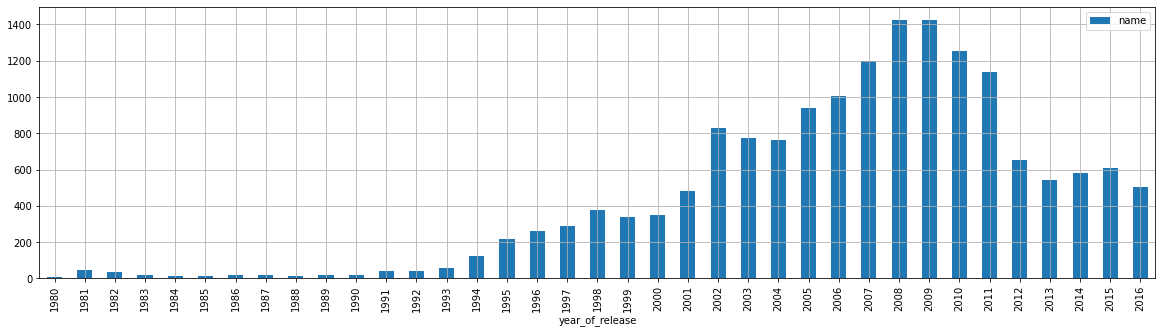

In [24]:
(how_much_games
 .plot(x = 'year_of_release',
       y = 'name', 
       kind = 'bar',
       figsize = (20,5), 
       grid=True)
);

На графике видно, что бурный всплеск роста выпускаемых игр начинается с 1991 года. Вплоть до 2009 года количество выпускаемых игр практически в каждый год увеличивалось, однако после 2009 года начинается резкое снижение количества выпускаемых игр. Возможно, это отголоски всемирного экономического кризиса?

### Как изменялись продажи игр по платформам

Проанализируем как изменялись продажи по платформам, для этого визуализируем таблицу с суммарным количеством проданых копий игр по платформам:

In [25]:
type_of_platforms = (data
                 .pivot_table(
                     index = 'platform',
                     values = 'total_sales',
                     aggfunc = 'sum')
                 .sort_values(by = 'total_sales', ascending = False)
) #визуализируем таблицу со всеми платформами
type_of_platforms

,total_sales
platform,
ps2,1233.56
x360,961.24
ps3,931.34
wii,891.18
ds,802.78
ps,727.58
ps4,314.14
gba,312.88
psp,289.53


In [26]:
unique_platform = len(data['platform'].unique()) #посчитаем сколько всего уникальных платформ существует
display(f' Количество уникальных платформ составляет {unique_platform} штук')

' Количество уникальных платформ составляет 31 штук'

<div class="alert alert-success">

**Артём:** 👍 Хорошо.

</div>

Итого, у нас представлено 31 платформа. Самой популярной по продаже игр является ps2 (1233.56 миллионов копий за весь промежуток), самой не популярной pcfx и gg (0.03 и 0.04 соответсвенно). Построим график, по годам и количеству проданных игр на каждую платформу:

In [27]:
type_of_platforms_pivot = (data
                     .pivot_table(
                         index = 'year_of_release',
                         values = 'total_sales',
                         columns = 'platform',
                         aggfunc = 'sum')
                     .fillna(0)                   
                 )  #создадим сводную таблицу для вывода графика 


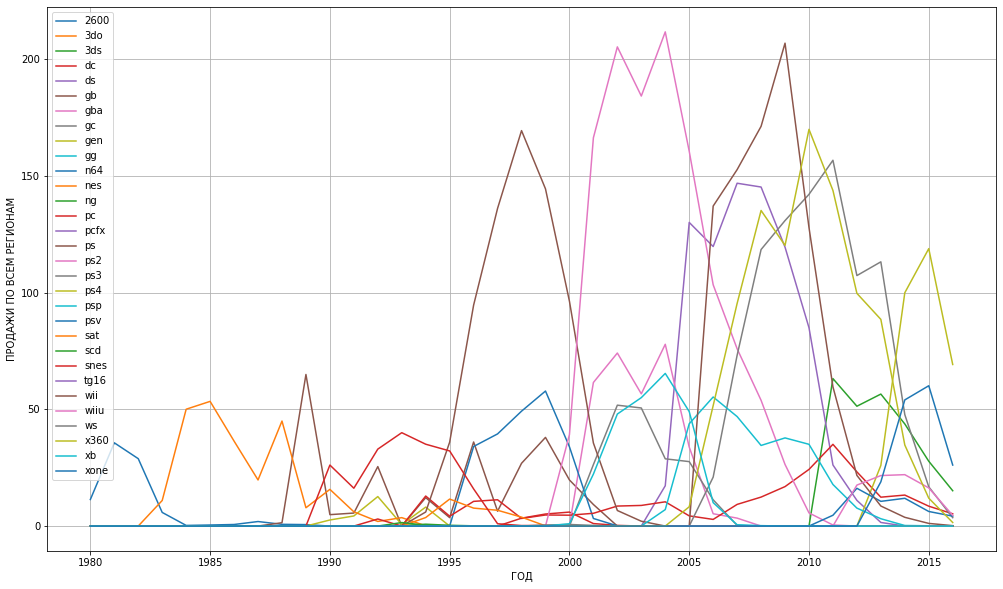

In [28]:
fig = plt.figure(figsize=(17,10))

ax = fig.add_subplot(111)

ax.plot(type_of_platforms_pivot)
ax.grid()
ax.set_xlabel('ГОД')
ax.set_ylabel('ПРОДАЖИ ПО ВСЕМ РЕГИОНАМ')

ax.legend(type_of_platforms_pivot.columns)

fig.show()

Если анализировать все платформы за весь представленный период, то выходит каша. Для того, чтобы можно адекватно было анализировать выделим 5 платформ c наибольшим количеством продаж. 

In [29]:
type_of_platforms_top = (data
                         
                 .pivot_table(
                     index = 'platform',
                     values = 'total_sales',
                     aggfunc = 'sum')
                         
                 .sort_values(by = 'total_sales', ascending = False)
                         
                 .head(5)
) #визуализируем таблицу с 5 самыми популярными платформами по количеству выпущенных игр за время их сущестования

type_of_platforms_top

,total_sales
platform,
ps2,1233.56
x360,961.24
ps3,931.34
wii,891.18
ds,802.78


In [30]:
five_top_platforms = (type_of_platforms_top
                      .reset_index(level = 'platform')
                      
                      .value_counts('platform')
                      
                      .sort_values(ascending = False).head(5).index
                     ) # индексы 5 топ платформ для графика       

In [31]:
type_of_platforms_pivot_top = (data
                               
                        .query('platform in @five_top_platforms')
                               
                        .pivot_table(
                            index = 'year_of_release',
                            columns = 'platform',
                            values = 'total_sales',
                            aggfunc = 'sum')
                               
                        .sort_values(by = 'year_of_release', ascending = False)
                               
                        .fillna(0)
                        ) #создадим сводную таблицу для вывода графика

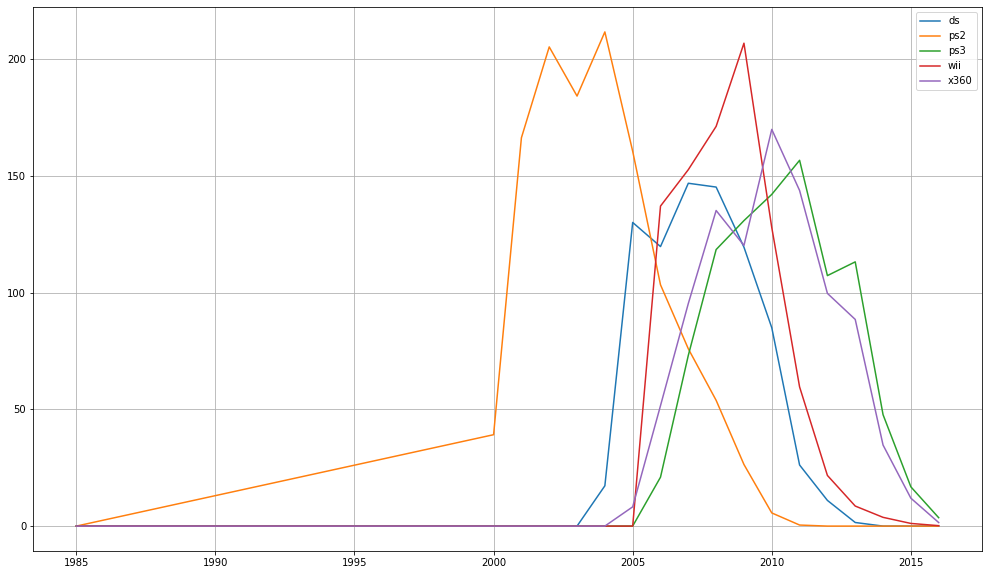

In [32]:
fig = plt.figure(figsize=(17,10))

ax = fig.add_subplot(111)

ax.plot(type_of_platforms_pivot_top)
ax.grid()

ax.legend(type_of_platforms_pivot_top.columns)

fig.show()


Так гораздо лучше. Видно, что 5 самых популярных платформ - ps2, x360, ps3, wii, ds. Так же видно, что у каждой платформы есть этап "точки популярности", когда продается наибольшее количество игр на определенную платформу, затем популярность падет и количесвто проданных игр так же стремится вниз. И если посмотреть на полный график со всеми платформами, видно, что обычно после прохождения "точки попуряности" и падения интереса к платформе среди покупателей, новый рост количества выпускаемых игр не наблюдается. 

Так же видно, что гонка платформ начинается после 1991 года, когда начинают появлятся новые платформы. Появление новых платформ так же сопровождается выигрыванием конкуренции у старых платформ и в дальнейшем исчезновения последних.

### Работа с актуальным периодом 

Для того, чтобы построить прогноз для 2017 года определим актуальный период с которым будем работать: 

1) В интервале 1991 года по 2009 происходи бурное развитие индустрии игр, количество выпускаемых игр растет с каждым годом.

2) После 2009 начинается резкое снижение количества выпускаемых игр и только в 2012 году резкое снижение останавливается. 

3) В периоде 2012-2016 не замечается резкого увеличения и уменьшения количества выпуска новых игр.

4) В связи с вышесказанным, интервал 2012-2016 более подходит для прогноза на 2017 год. Так как правила "игры" изменились, то для прогноза на 2017 год нам не подойдут интервалы, когда происходил резкий рост 1991-2009 год и резкое падение 2009-2012 года. Будем оперировать более реалистичной динамикой, которая поможет нам спрогнозировать поведение рынка приближенного к реальности.

#### Анализ актуального периода

Выделим в отдельную переменную current_period период, который будем изучать для прогноза на 2017 год:

In [33]:
current_period = data.query('year_of_release >= 2012') #выделим актуальный период

In [34]:
type_of_platforms_current_period = (current_period
                 
                 .pivot_table(
                     index = 'platform',
                     values = 'total_sales',
                     aggfunc = 'sum')
                                        
                 .sort_values(by = 'total_sales', ascending = False)
        
) #визуализируем таблицу со всеми платформами за актуальный период
type_of_platforms_current_period

,total_sales
platform,
ps4,314.14
ps3,288.79
x360,236.54
3ds,194.61
xone,159.32
wiiu,82.19
pc,62.65
psv,49.18
wii,35.37


In [35]:
unique_platform_current_period = len(current_period['platform'].unique()) #посчитаем сколько всего уникальных платформ существует
display(f' Количество уникальных платформ за актуальный период составляет {unique_platform_current_period } штук')

' Количество уникальных платформ за актуальный период составляет 11 штук'

In [36]:
type_of_platforms_current_period_graf = (current_period
                        
                        .pivot_table(
                            index = 'year_of_release',
                            columns = 'platform',
                            values = 'total_sales',
                            aggfunc = 'sum')
                                    
                        .sort_values(by = 'year_of_release', ascending = False)
                        .fillna(0)
                        ) #создадим сводную таблицу для вывода графика продаж за актуальный период

Выведем график на экран:

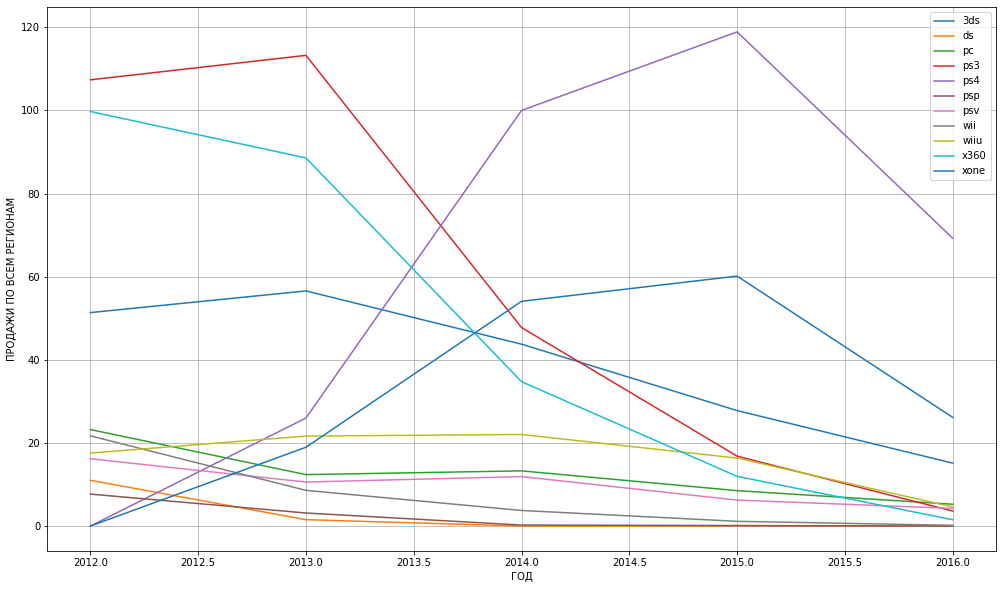

In [37]:
fig = plt.figure(figsize=(17,10))

ax = fig.add_subplot(111)

ax.plot(type_of_platforms_current_period_graf)
ax.grid()
ax.set_xlabel('ГОД')
ax.set_ylabel('ПРОДАЖИ ПО ВСЕМ РЕГИОНАМ')

ax.legend(type_of_platforms_current_period_graf.columns)

fig.show()


Получаем 11 графиков, анализировать не очень удобно, поэтому выведем график по топ 5 платформ за актуальный период:

In [38]:
top_platforms_current_period = (current_period
      .pivot_table(
          index = 'platform',
          values = 'total_sales',
          aggfunc = 'sum')
      .sort_values(by = 'total_sales', ascending = False)
      .head(5)
     )
top_platforms_current_period

,total_sales
platform,
ps4,314.14
ps3,288.79
x360,236.54
3ds,194.61
xone,159.32


In [39]:
five_top_platforms_current_period = (top_platforms_current_period
                      .reset_index(level = 'platform')
                      .value_counts('platform')
                      .head(5).index
                     ) # индексы 5 топ платформ для графика 

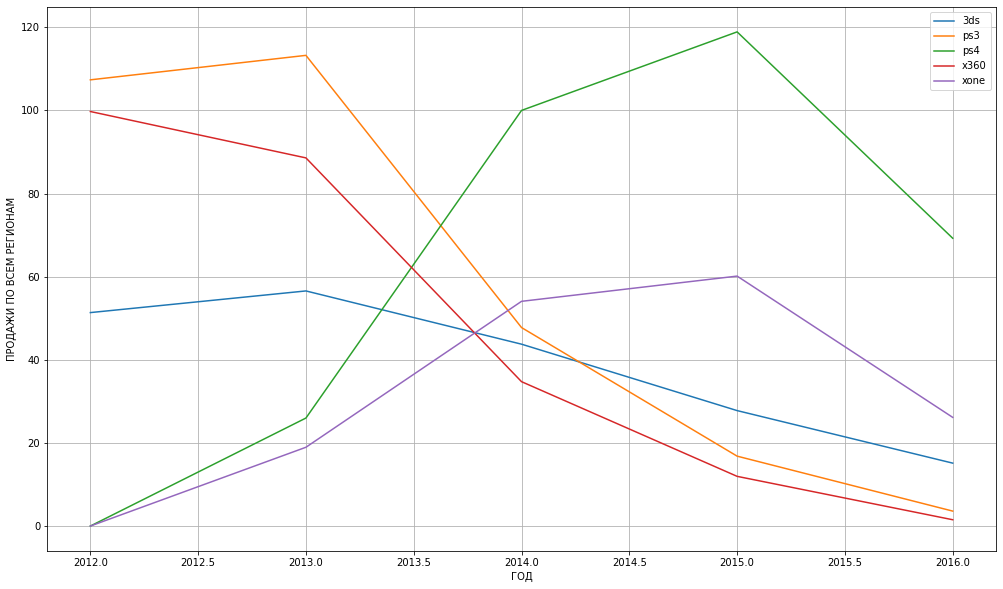

In [40]:
type_of_platforms_top_current_period_graf = (current_period
                        .query('platform in @five_top_platforms_current_period')
                        .pivot_table(
                            index = 'year_of_release',
                            columns = 'platform',
                            values = 'total_sales',
                            aggfunc = 'sum')
                                    
                        .sort_values(by = 'year_of_release', ascending = False)
                        .fillna(0)
                        ) #создадим сводную таблицу для вывода графика продаж за актуальный период


fig = plt.figure(figsize=(17,10))
ax = fig.add_subplot(111)

ax.plot(type_of_platforms_top_current_period_graf)
ax.grid()
ax.legend(type_of_platforms_top_current_period_graf.columns)
ax.set_xlabel('ГОД')
ax.set_ylabel('ПРОДАЖИ ПО ВСЕМ РЕГИОНАМ')

fig.show()  #выводим график с топ 5 за актуальный период

Из графика топ 5 платформ по продажам и таблицы за 2012-2016 видно, что самая популярная платформа ps4. Продажи ps4 росли до 2015 года, однако, после 2015 года продажи начали стремительно падать. Так же себя ведет и самая непопулярная платформа по продажи игр xone.

Резкое падение продаж в 2013 году началось сразу у 3-х платформ ps3, x360, 3ds (расположены в порядке убывания популярности). В интервале 2012-2013 у этих платформ наблюдалась стагнация.

#### Анализ ящика с усами

Проведем анализ по ящику с усами, для этого выведем на экран:

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

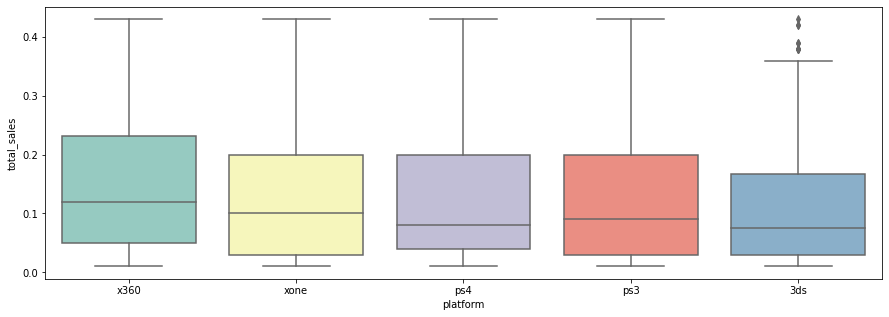

In [41]:
top_quantile = current_period['total_sales'].quantile(0.75)

fig, ax = plt.subplots(figsize =(15,5))

sns.boxplot(
    x = 'platform', 
    y = 'total_sales', 
    data = current_period.query('total_sales <= @top_quantile & platform == ["ps4", "ps3", "x360", "3ds","xone"]'),
    palette="Set3"
) 

In [42]:
analys_box = (current_period
              .pivot_table(
                  index = 'platform',
                  values = 'total_sales',
                  aggfunc = ['sum', 'mean', 'median', (np.var), (np.std)])
              )

analys_box.columns = ['total_sales', 'mean', 'median','var', 'std']
analys_box.sort_values(by = 'total_sales', ascending = False).head(5)

,total_sales,mean,median,var,std
platform,,,,,
ps4,314.14,0.801378,0.20,2.590350,1.609456
ps3,288.79,0.585781,0.20,2.139946,1.462855
x360,236.54,0.810068,0.31,2.931181,1.712069
3ds,194.61,0.491439,0.11,1.924217,1.387161
xone,159.32,0.645020,0.22,1.073584,1.036139


У платформ ps4, ps3 и 3ds большая часть значений больше медианного, наиболее равномерно распределены значения у платформы x360 и xone. Самая большое медианное количество продаж приходится на x360, самое маленькое на 3ds. То есть в по медианному показателю у x360 продажи  больше. Возможно, если бы на x360выпускалось больше игр, то она сталабы самой популярной платформой.

#### Анализ по отзывам

Для анализа по отзывам провернем следущие действия:

1) Возмем самую актуальную платформу

2) Построим диаграмму рассеивания

3) Посчитаем корреляцию между отзывами  и продажами.

Для анализа возьмем самую популярную платформу в нашем актуальном периоде - ps4. Для этого выделим ее в отдельную переменную ps4_analysi:

In [43]:
ps4_analysis = current_period.query('platform == "ps4"') #выделим в переменную данные по ps4

Выведим таблицу корреляции общих продаж от оценки пользователей и критиков:

<AxesSubplot:>

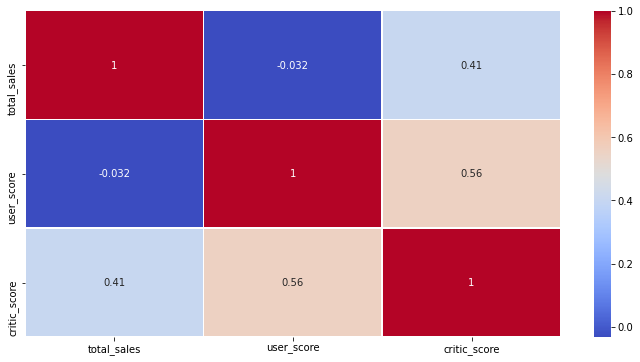

In [44]:
plt.figure(figsize=(12, 6))
sns.heatmap(ps4_analysis[['total_sales', 'user_score', 'critic_score']]
            .corr(), 
            annot = True,
            linewidths = .5,
            cmap = 'coolwarm')

Из таблицы корреляции хорошо видно, что продажи сильно зависят (имеют положительную корреляцию) от оценки которую выставляют критики, а вот корреляции продаж от оценки пользователей не наблюдается. Это и логичо, всегда критики задают вектор.

Выведим на экран диаграмму рассеивания и сотовую диаграмму:

(-0.5, 5.0)

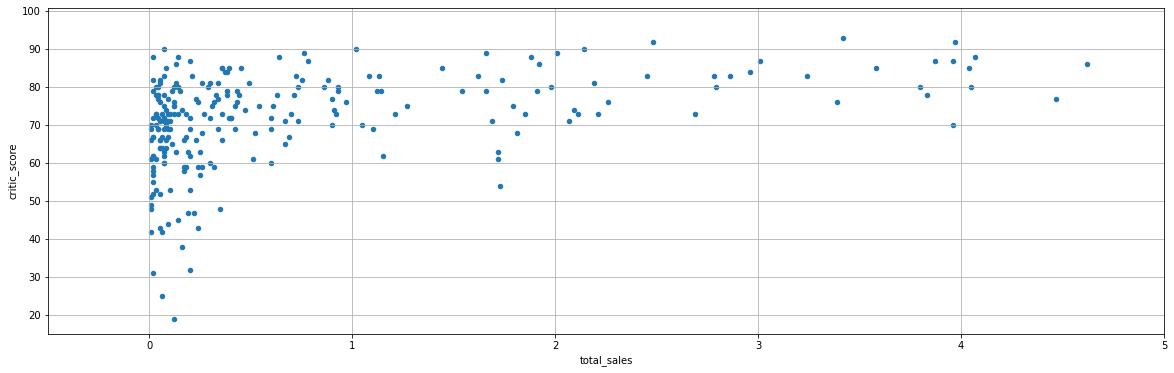

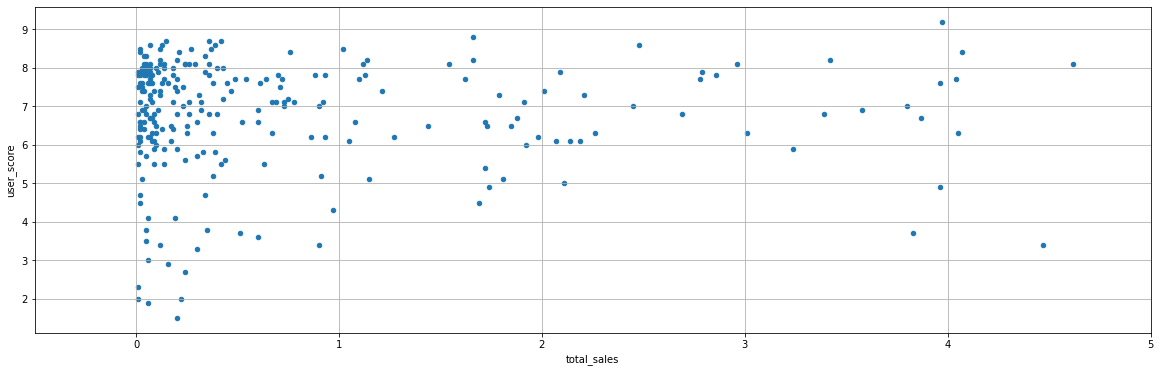

In [45]:
ps4_analysis.plot(x='total_sales', y='critic_score', kind='scatter', figsize=(20, 6), grid=True)
plt.xlim([-0.5, 5])
ps4_analysis.plot(x='total_sales', y='user_score', kind='scatter', figsize=(20, 6), grid=True)
plt.xlim([-0.5, 5])

Интересно, но на диаграмме рассеивания не так сильно заметно той самой сильной положительной корреляции между отзывами критиков и продажами. Однако, хорошо видно, какой большой разброс оценок у пользователей и сразу становится понятно, почему продажи не коррелируются к оценками пользователей (пользовватели часто бывают необъективны и поддаются эмоциям)

Выведим таблицу корреляции и для других популряных платформ:

###### Продажи по другим платформам

Выведим таблицу корреляции для всех популряных платформ:

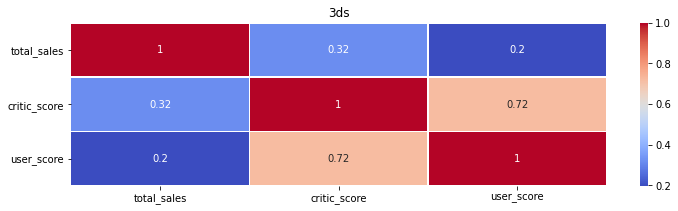

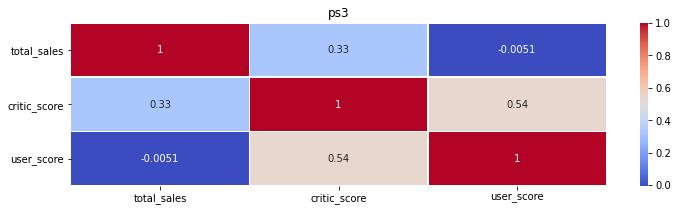

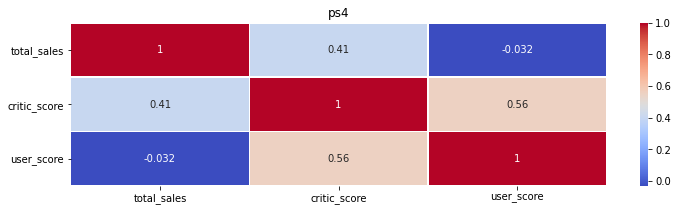

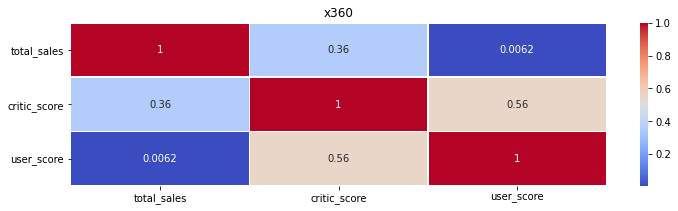

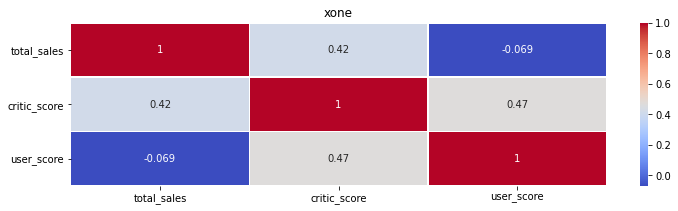

In [46]:
for cor in five_top_platforms_current_period:
    plt.subplots(1, figsize=(12,3))
    plt.title(cor)
    sns.heatmap(current_period[current_period['platform'] == cor][['total_sales', 'critic_score', 'user_score']]
            .corr(), 
            annot = True,
            linewidths = .5,
            cmap = 'coolwarm')


На других платформах также заметна ярковыраженная положительная корреляция  продаж от отзывов критиков. Интересно, что пользовательская оценка не влияет на продажи, однако у платофрмы 3ds замечана положительная корреляция продаж от отзывов пользователей.

#### Анализ по жанрам

Проведем анализ по жанрам, для этого составим сводную таблицу, узнаем, какой жанр самый продаваемый:

<AxesSubplot:ylabel='genre'>

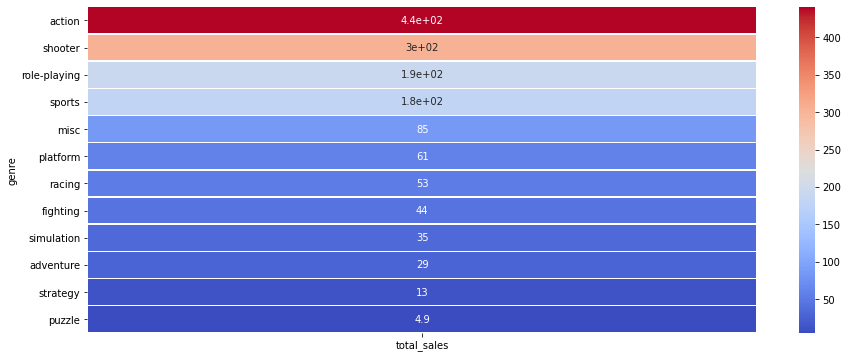

In [47]:
sales_by_genre_top = (current_period
                      .pivot_table(
                     index = 'genre',
                     values = 'total_sales',
                     aggfunc = 'sum')
                      .sort_values(by = 'total_sales', ascending = False)
) #визуализируем таблицу со всеми жанрами за актуальный период

plt.figure(figsize=(15, 6))
sns.heatmap(sales_by_genre_top,
           annot = True,
           cmap= 'coolwarm',
           linewidths=.5)

Как видно из нашей таблицей, самый продаваемый жанр игр это action, а самый непопулярный и непродаваемый жанр это puzzle (занудство же :)). 

Итак, топ по продажам у нас выглядит так:
- action
- shooter
- role-plaing


Выведим на экран таблицу жанра к платформе, посмотрим медианные продажи к каждой платформе.

<AxesSubplot:xlabel='platform', ylabel='genre'>

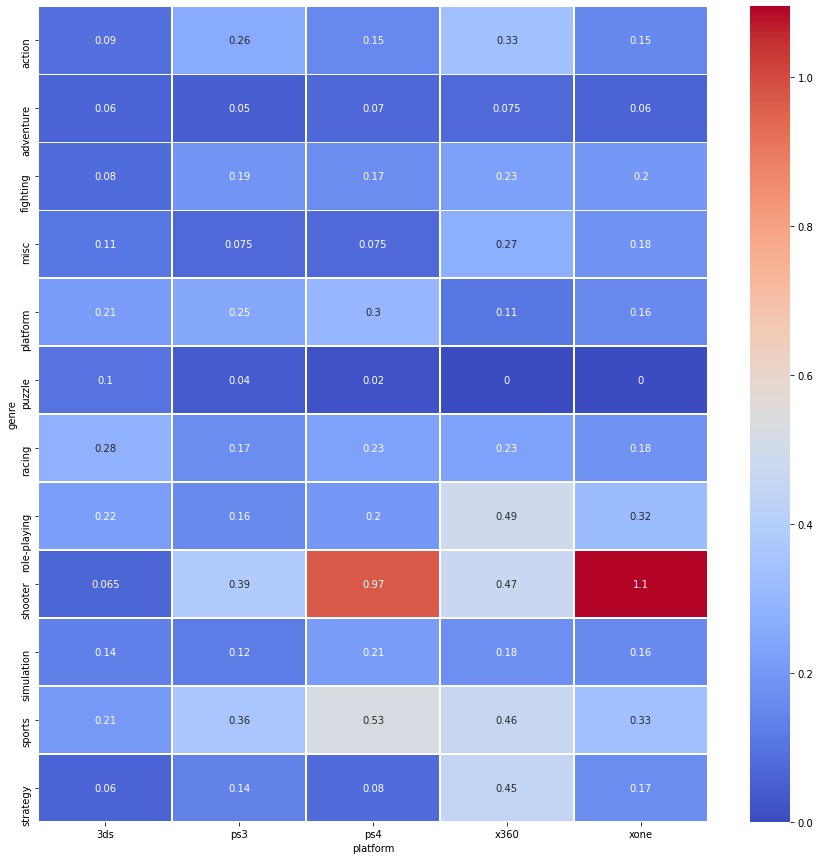

In [48]:
sales_by_genre = (current_period
                  .query('platform in @five_top_platforms_current_period')
                  .pivot_table(
                      index = 'genre',
                      values = 'total_sales',
                      columns = 'platform',
                      aggfunc = 'median')
                  .fillna(0)
                )

plt.figure(figsize=(15, 15))
sns.heatmap(sales_by_genre,
           annot = True,
            cmap= 'coolwarm',
            linewidths=.5)

<AxesSubplot:ylabel='genre'>

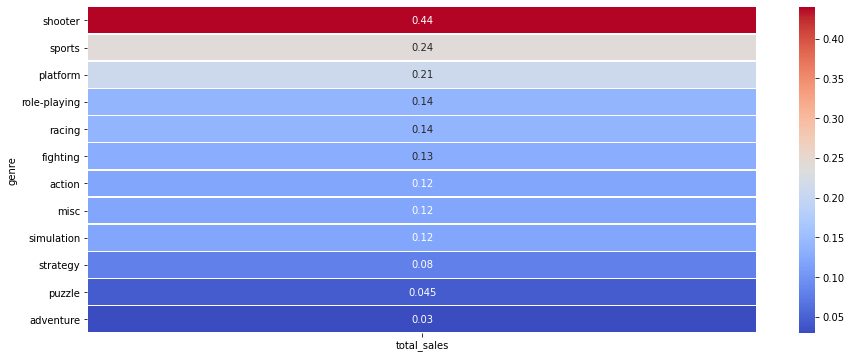

In [49]:
sales_by_genre_top = (current_period
                      .pivot_table(
                     index = 'genre',
                     values = 'total_sales',
                     aggfunc = 'median')
                      .sort_values(by = 'total_sales', ascending = False)
) #визуализируем таблицу со всеми жанрами за актуальный период

plt.figure(figsize=(15, 6))
sns.heatmap(sales_by_genre_top,
           annot = True,
           cmap= 'coolwarm',
           linewidths=.5)

Рассмотрев выше суммарные продажи по жанрам мы сделали вывод, что самыми популярными  являются - action, shooter и role-playing. Однако, за высоким показателем может скрываться множество мелких игр с низкими продажами. Поэтому было принято решение рассматривать медианные продажи по жанрам для каждой платформы.

В таком случае, самые большие медианные продажи оказались у жанра shooter на платформу xone c 1,1м продаж, на втором месте оказался так же shooter для платформы ps4 с 0,97м продаж, третье место занял (что неожиданно) sports для платформы ps4 с 0,53м продаж. 

Рейтинг по медианным продажам по жанрам в порядке убывания выглядид следущим образом: shooter, sports и platform.

### Портрет пользователя по регионам

Расмотрим как изменяется покупательские предпочтение в зависимости от региона. В данном разделе рассмотрим следущие моменты:

- самые популярные платформы по регионам,
- самые популярные жанры по регионам,
- как влияет рейтинг esrb на продажи.

#### Самые популярные платформы по регионам (топ-5). 

In [50]:
rating_table = (current_period
                      .pivot_table(
                          index = 'platform',
                          values = ['eu_sales', 'jp_sales', 'na_sales'],
                          aggfunc = ['sum'])
                     )

rating_table.columns = ['eu_sales', 'jp_sales', 'na_sales']

rating_table

#plt.figure(figsize=(20, 10))
#sns.heatmap(rating_table, annot = True, cmap= 'coolwarm', linewidths=.5)

,eu_sales,jp_sales,na_sales
platform,,,
3ds,42.64,87.79,55.31
ds,3.53,3.72,4.59
pc,37.76,0.00,19.12
ps3,106.86,35.29,103.38
ps4,141.09,15.96,108.74
psp,0.42,10.47,0.13
psv,11.36,21.04,10.98
wii,11.92,3.39,17.45
wiiu,25.13,13.01,38.10


<AxesSubplot:ylabel='na_sales'>

<Figure size 1080x432 with 0 Axes>

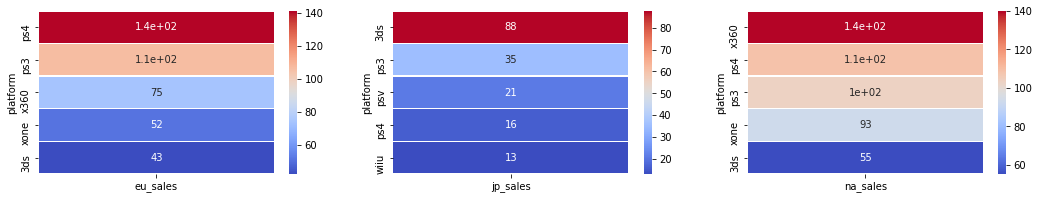

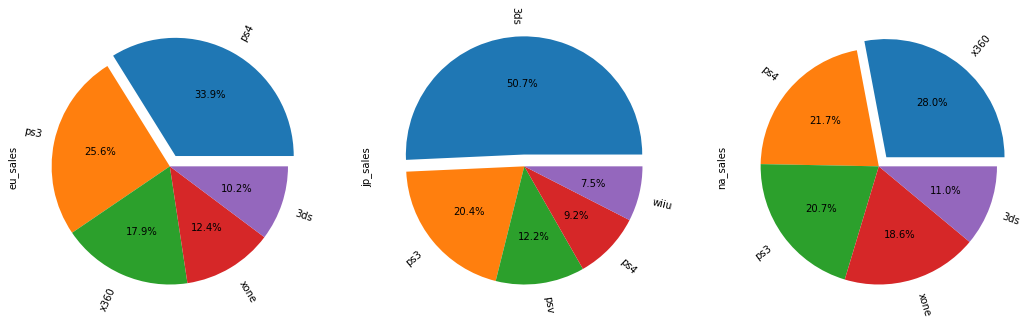

In [51]:
top_eu = rating_table.pivot_table(
    index = 'platform',
    values = 'eu_sales').sort_values(by = 'eu_sales', ascending = False).head(5)

top_jp = rating_table.pivot_table(
    index = 'platform',
    values = 'jp_sales').sort_values(by = 'jp_sales', ascending = False).head(5)

top_na = rating_table.pivot_table(
    index = 'platform',
    values = 'na_sales').sort_values(by = 'na_sales', ascending = False).head(5)
plt.figure(figsize=(15, 6))


fig, ax = plt.subplots(1,3, figsize=(18,3))
sns.heatmap(top_eu, annot = True, cmap= 'coolwarm', linewidths=.5, ax=ax[0])
sns.heatmap(top_jp, annot = True, cmap= 'coolwarm', linewidths=.5, ax=ax[1])
sns.heatmap(top_na, annot = True, cmap= 'coolwarm', linewidths=.5, ax=ax[2])
    

fig, ax = plt.subplots(1,3, figsize=(18,7))
explode = (0.1, 0, 0, 0, 0)
top_eu['eu_sales'].plot.pie(ax=ax[0], autopct = '%1.1f%%', rotatelabels = True, explode = explode)
top_jp['jp_sales'].plot.pie(ax=ax[1], autopct = '%1.1f%%', rotatelabels = True, explode = explode )
top_na['na_sales'].plot.pie(ax=ax[2], autopct = '%1.1f%%', rotatelabels = True, explode = explode )



Из таблиц и круговых диаграм можно сделать следущие выводы:

1) В европеском регионе популярной платформой является ps4, на нее приходится 34% рынка, а самой непопулярной 3ds 10.2%.

2) В японском регионе преобладает 3ds, на нее приходится почти 51% всего рынка. А вот самой непопулярной платформой оказалась wiiu c 7.5%.

3) В Интересн, чтов  северной америке продажи на платформы распределены более равномерно. Самой популярной платформой является x360 на нее приходится 28% рынка. Меньше всего продаж у 3ds на нее приходится 11% рынка.

#### Самые популярные жанры по регионам (топ-5)

Изучим, какие жанры являются популярными в разных регионах. Для начала создадим сводную таблицу по жанрам и продажам в регионах:

In [52]:
rating_table_genre = (current_period
                      .pivot_table(
                          index = 'genre',
                          values = ['eu_sales', 'jp_sales', 'na_sales'],
                          aggfunc = ['sum'])
                     )

rating_table_genre.columns = ['eu_sales', 'jp_sales', 'na_sales']

rating_table_genre


,eu_sales,jp_sales,na_sales
genre,,,
action,159.34,52.80,177.84
adventure,9.46,8.24,8.92
fighting,10.79,9.44,19.79
misc,26.32,12.86,38.19
platform,21.41,8.63,25.38
puzzle,1.40,2.14,1.13
racing,27.29,2.50,17.22
role-playing,48.53,65.44,64.00
shooter,113.47,9.23,144.77


Составим рейтинги. Выведим на экран 5 самых популярных жанров и составим по ним круговые диаграммы:

<AxesSubplot:ylabel='na_sales'>

<Figure size 1080x432 with 0 Axes>

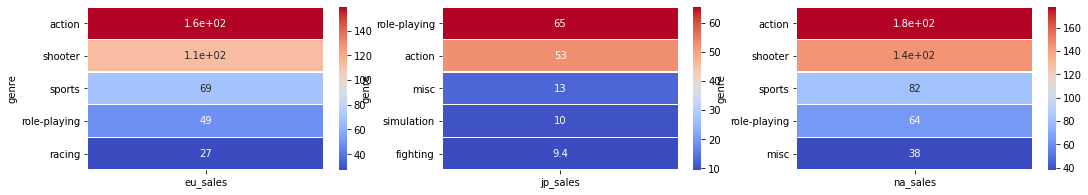

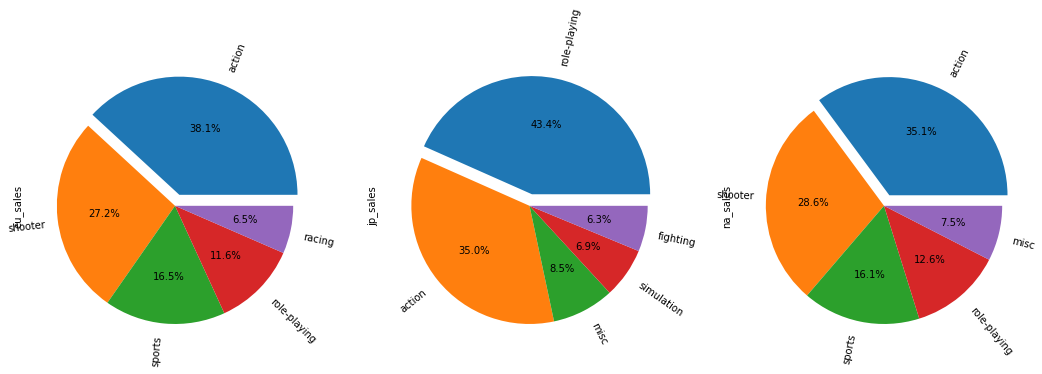

In [53]:
top_eu_genre = rating_table_genre.pivot_table(
    index = 'genre',
    values = 'eu_sales').sort_values(by = 'eu_sales', ascending = False).head(5)

top_jp_genre = rating_table_genre.pivot_table(
    index = 'genre',
    values = 'jp_sales').sort_values(by = 'jp_sales', ascending = False).head(5)

top_na_genre = rating_table_genre.pivot_table(
    index = 'genre',
    values = 'na_sales').sort_values(by = 'na_sales', ascending = False).head(5)
plt.figure(figsize=(15, 6))


fig, ax = plt.subplots(1,3, figsize=(18,3))
sns.heatmap(top_eu_genre, annot = True, cmap= 'coolwarm', linewidths=.5, ax=ax[0])
sns.heatmap(top_jp_genre, annot = True, cmap= 'coolwarm', linewidths=.5, ax=ax[1])
sns.heatmap(top_na_genre, annot = True, cmap= 'coolwarm', linewidths=.5, ax=ax[2])
    

fig, ax = plt.subplots(1,3, figsize=(18,7))
explode = (0.1, 0, 0, 0, 0)
top_eu_genre['eu_sales'].plot.pie(ax=ax[0], autopct = '%1.1f%%', rotatelabels = True, explode = explode)
top_jp_genre['jp_sales'].plot.pie(ax=ax[1], autopct = '%1.1f%%', rotatelabels = True, explode = explode )
top_na_genre['na_sales'].plot.pie(ax=ax[2], autopct = '%1.1f%%', rotatelabels = True, explode = explode )



Исходя из наших диаграм, можно сделать следущие выводы:

1) В европейском регионе самым популярным жанром является action на него приходится 38,1% процента всего рынка. Самым непопулярным жанром является racing - 6.5% от всех продаж.

2) В японском регионе преобладает role-plaing. На этот жанр приходится 43,4% всго рынка игр. Непопулярным жанром в японии является fighting - 6.3% от всех продаж.

3) А вот в северо-американском регионе снова преобладает action - 35,1% всех продаж. Непопулярным жанром в этом регионе является  misc на него приходится 7,5% всех продаж.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Рейтинг от организации ESRB (англ. Entertainment Software Rating
Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает
им подходящую возрастную категорию:

- «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет.
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. 
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.

###### вариант 1

In [54]:
rating_esrb = (current_period
               .pivot_table(
                   index = 'rating',
                   values = ['eu_sales', 'jp_sales', 'na_sales'],
                   aggfunc = 'sum')
               .reset_index()
              )
rating_esrb

,rating,eu_sales,jp_sales,na_sales
0,e,113.03,28.33,114.37
1,e10+,55.37,8.19,75.70
2,m,193.96,21.20,231.57
3,t,52.96,26.02,66.02


<AxesSubplot:ylabel='na_sales'>

<Figure size 1080x432 with 0 Axes>

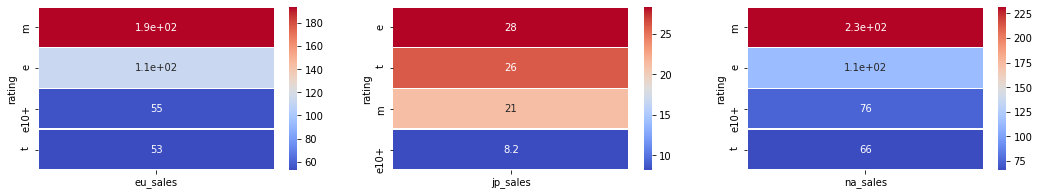

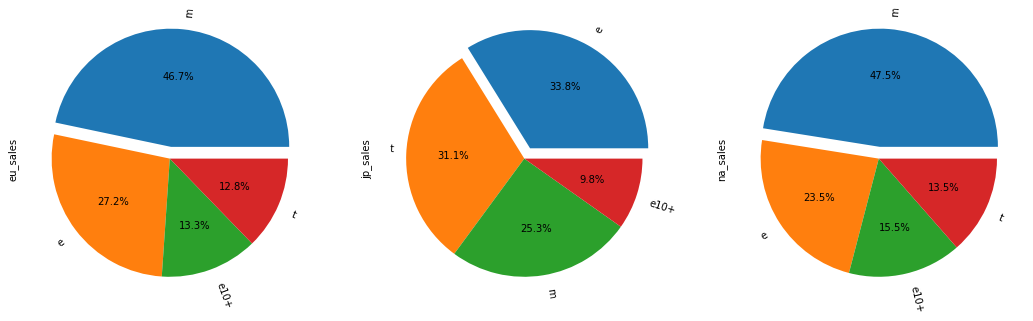

In [55]:
top_eu_esrb = rating_esrb.pivot_table(
    index = 'rating',
    values = 'eu_sales').sort_values(by = 'eu_sales', ascending = False).head(5)

top_jp_esrb = rating_esrb.pivot_table(
    index = 'rating',
    values = 'jp_sales').sort_values(by = 'jp_sales', ascending = False).head(5)

top_na_esrb = rating_esrb.pivot_table(
    index = 'rating',
    values = 'na_sales').sort_values(by = 'na_sales', ascending = False).head(5)
plt.figure(figsize=(15, 6))


fig, ax = plt.subplots(1,3, figsize=(18,3))
sns.heatmap(top_eu_esrb, annot = True, cmap= 'coolwarm', linewidths=.5, ax=ax[0])
sns.heatmap(top_jp_esrb, annot = True, cmap= 'coolwarm', linewidths=.5, ax=ax[1])
sns.heatmap(top_na_esrb, annot = True, cmap= 'coolwarm', linewidths=.5, ax=ax[2])
    

fig, ax = plt.subplots(1,3, figsize=(18,7))
explode = (0.1, 0, 0, 0)
top_eu_esrb['eu_sales'].plot.pie(ax=ax[0], autopct = '%1.1f%%', rotatelabels = True, explode = explode)
top_jp_esrb['jp_sales'].plot.pie(ax=ax[1], autopct = '%1.1f%%', rotatelabels = True, explode = explode )
top_na_esrb['na_sales'].plot.pie(ax=ax[2], autopct = '%1.1f%%', rotatelabels = True, explode = explode )

Интересно, что в разных регонах преддпочитают разные возрастные категории:

1) В  европейском регионе преобладает категория m(для взрослых) - 46,7% от рынка

2) В японском регионе преобладает категория e(для всех) - 33,8% от рынка

3) В северно-американском регионе также преобладает категория m(для взрослых) - 47,5% от рынка

###### вариант 2

В значених возрастного рейтинга присутствуют пропущенные значения, при первом варианте анализа они блыи выбрашены и не участвовали в изучении. Для того, чтобы наши пропущенные значения попали в анализ сделаем из пропусков значение-заглушку со значением no_rating.

/tmp/ipykernel_173/105627148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_period['rating_no'] = current_period['rating'].fillna('no_rating') #заполняем пропуски


<AxesSubplot:ylabel='na_sales'>

<Figure size 1080x432 with 0 Axes>

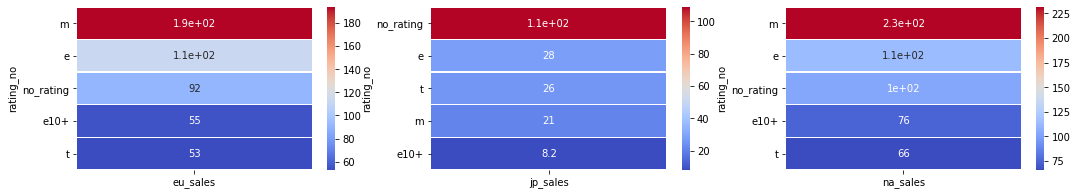

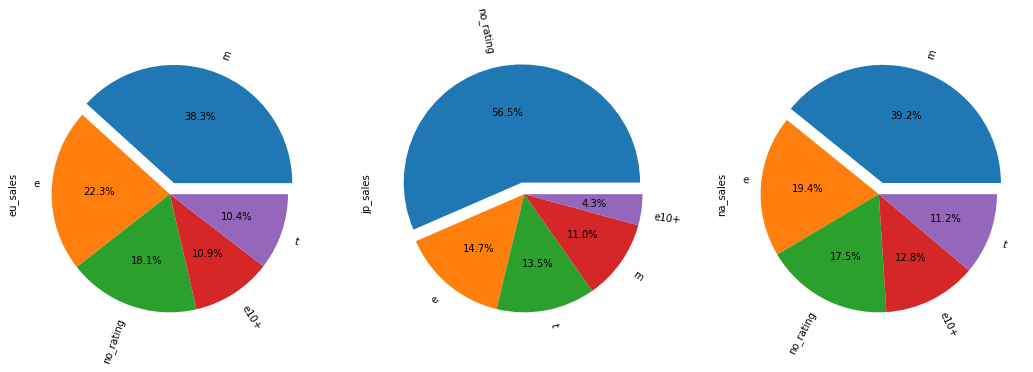

In [56]:
current_period['rating_no'] = current_period['rating'].fillna('no_rating') #заполняем пропуски

rating_not = (current_period
               .pivot_table(
                   index = 'rating_no',
                   values = ['eu_sales', 'jp_sales', 'na_sales'],
                   aggfunc = 'sum')
               .reset_index()
              )

top_eu_esrb_no_rating = rating_not.pivot_table(
    index = 'rating_no',
    values = 'eu_sales').sort_values(by = 'eu_sales', ascending = False).head(5)

top_jp_esrb_no_rating = rating_not.pivot_table(
    index = 'rating_no',
    values = 'jp_sales').sort_values(by = 'jp_sales', ascending = False).head(5)

top_na_esrb_no_rating = rating_not.pivot_table(
    index = 'rating_no',
    values = 'na_sales').sort_values(by = 'na_sales', ascending = False).head(5)
plt.figure(figsize=(15, 6))


fig, ax = plt.subplots(1,3, figsize=(18,3))
sns.heatmap(top_eu_esrb_no_rating, annot = True, cmap= 'coolwarm', linewidths=.5, ax=ax[0])
sns.heatmap(top_jp_esrb_no_rating, annot = True, cmap= 'coolwarm', linewidths=.5, ax=ax[1])
sns.heatmap(top_na_esrb_no_rating, annot = True, cmap= 'coolwarm', linewidths=.5, ax=ax[2])
    

fig, ax = plt.subplots(1,3, figsize=(18,7))
explode = (0.1, 0, 0, 0, 0)

top_eu_esrb_no_rating['eu_sales'].plot.pie(ax=ax[0], autopct = '%1.1f%%', rotatelabels = True, explode = explode)
top_jp_esrb_no_rating['jp_sales'].plot.pie(ax=ax[1], autopct = '%1.1f%%', rotatelabels = True, explode = explode )
top_na_esrb_no_rating['na_sales'].plot.pie(ax=ax[2], autopct = '%1.1f%%', rotatelabels = True, explode = explode )

При испоьзовании значения-заглушки получаются следущие результаты:
1) В европейском регоне преобладает рейтинг mature 38,3% от всего рынка

2) В японском регионе преобладают игры без рейтинга (no_rating) и составляют 56,5% от всего рынка

3) В северо-американском регионе снова преобладает рейтинг mature - 39,2% от всего рынка.

###### вариант 3

 Так как определенным жанрам свойствененн определенные возрастной ценз, то логично что с большой вероятностью жанр категории shooter будет иметь рейтинг mature. Поэтому было принято решение происвоить каждому возрастному рейтингу числовое значение, высчитать медианное значение и заполнить пропуски полученными данным:

In [57]:
for i in current_period['rating']: #присвоим буквенным значениям числовые
    current_period.loc[(current_period['rating'] == 'm'), 'rating'] = 1
    current_period.loc[(current_period['rating'] == 'e'), 'rating'] = 2
    current_period.loc[(current_period['rating'] == 'e10+'), 'rating'] = 3
    current_period.loc[(current_period['rating'] == 't'), 'rating'] = 4

current_period['rating'] = current_period['rating'].astype('float') #заменими object на float для работы с вычислениями

current_period['rating'].unique() #проверим

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/tmp/ipykernel_173/3259045362.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_period['rating'] = current_period['rating'].astype('float') #заменими object на float для работы с вычислениями


array([ 1., nan,  2.,  3.,  4.])

In [58]:
fr = (current_period
      .pivot_table(
          index = 'genre',
          values = 'rating',
          aggfunc = 'median')
      .reset_index()
      .round() 
              ) #составим сводную таблицу с рейтингами по жанрам
fr.columns = ['genre', 'rating_new']
fr

,genre,rating_new
0,action,2.0
1,adventure,2.0
2,fighting,4.0
3,misc,3.0
4,platform,3.0
5,puzzle,2.0
6,racing,2.0
7,role-playing,3.0
8,shooter,1.0
9,simulation,2.0


In [59]:
current_period = current_period.merge(fr, on = 'genre', how='left') 
#присоединим сводную таблицу с рейтингами к нашему отборному датасету

current_period['rating'] = (current_period['rating']
                            .fillna(current_period['rating_new'])) #заполним медианными значениями пропуски 

current_period.drop('rating_new', axis=1, inplace=True) #удалим столбец из которого заполняли 

current_period.head(20) #проверим успешность заполнения

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,rating_no
0,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,1.0,21.05,m
1,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,1.0,16.27,m
2,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,1.0,14.63,no_rating
3,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,3.0,14.60,no_rating
4,call of duty: black ops ii,ps3,2012,shooter,4.99,5.73,0.65,2.42,83.0,5.3,1.0,13.79,m
5,call of duty: black ops ii,x360,2012,shooter,8.25,4.24,0.07,1.12,83.0,4.8,1.0,13.68,m
6,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,1.0,12.62,m
7,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,3.0,11.68,no_rating
8,call of duty: ghosts,x360,2013,shooter,6.73,2.56,0.04,0.91,73.0,2.6,1.0,10.24,m
9,new super mario bros. 2,3ds,2012,platform,3.66,3.14,2.47,0.63,78.0,7.2,2.0,9.90,e


In [60]:
for revers in current_period['rating']: # сделаем реверс присвоим числовым значениям буквенные
    current_period.loc[(current_period['rating'] == 1), 'rating'] = 'm'
    current_period.loc[(current_period['rating'] == 2), 'rating'] = 'e'
    current_period.loc[(current_period['rating'] == 3), 'rating'] = 'e10+'
    current_period.loc[(current_period['rating'] == 4), 'rating'] = 't'

current_period['rating'].unique() #проверим

array(['m', 'e10+', 'e', 't'], dtype=object)

Выведим новые результаты по новому методу подсчета:

In [61]:
rating_esrb_new = (current_period
                   .pivot_table(
                       index = 'rating',
                       values = ['eu_sales', 'jp_sales', 'na_sales'],
                       aggfunc = 'sum')
                   .reset_index()
              )
rating_esrb_new

,rating,eu_sales,jp_sales,na_sales
0,e,150.53,74.05,147.31
1,e10+,88.79,64.94,118.90
2,m,211.19,22.29,251.43
3,t,56.31,31.30,73.33


<AxesSubplot:ylabel='na_sales'>

<Figure size 1080x432 with 0 Axes>

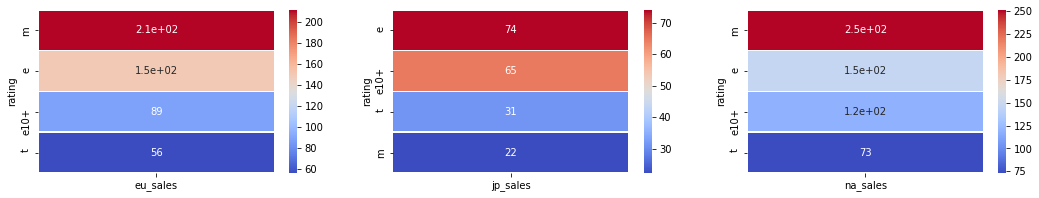

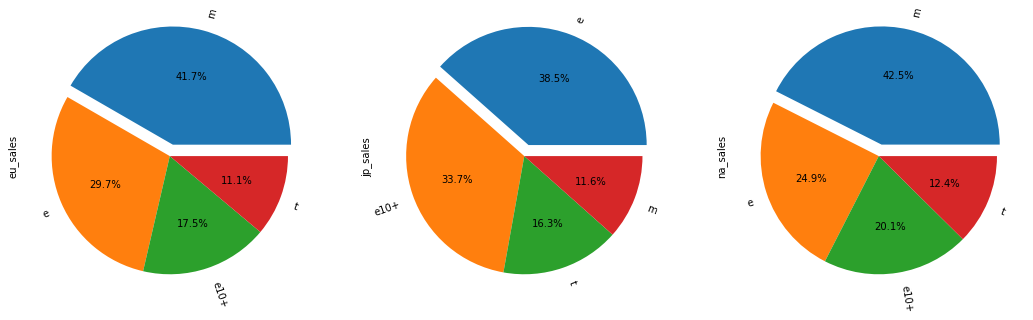

In [62]:
top_eu_esrb_new = rating_esrb_new.pivot_table(
    index = 'rating',
    values = 'eu_sales').sort_values(by = 'eu_sales', ascending = False).head(5)

top_jp_esrb_new = rating_esrb_new.pivot_table(
    index = 'rating',
    values = 'jp_sales').sort_values(by = 'jp_sales', ascending = False).head(5)

top_na_esrb_new = rating_esrb_new.pivot_table(
    index = 'rating',
    values = 'na_sales').sort_values(by = 'na_sales', ascending = False).head(5)
plt.figure(figsize=(15, 6))


fig, ax = plt.subplots(1,3, figsize=(18,3))
sns.heatmap(top_eu_esrb_new, annot = True, cmap= 'coolwarm', linewidths=.5, ax=ax[0])
sns.heatmap(top_jp_esrb_new, annot = True, cmap= 'coolwarm', linewidths=.5, ax=ax[1])
sns.heatmap(top_na_esrb_new, annot = True, cmap= 'coolwarm', linewidths=.5, ax=ax[2])
    

fig, ax = plt.subplots(1,3, figsize=(18,7))
explode = (0.1, 0, 0, 0)
top_eu_esrb_new['eu_sales'].plot.pie(ax=ax[0], autopct = '%1.1f%%', rotatelabels = True, explode = explode)
top_jp_esrb_new['jp_sales'].plot.pie(ax=ax[1], autopct = '%1.1f%%', rotatelabels = True, explode = explode )
top_na_esrb_new['na_sales'].plot.pie(ax=ax[2], autopct = '%1.1f%%', rotatelabels = True, explode = explode )

С новым методом подсчета, результаты значительно не изменились, лидеры остались прежними:

1) В европейском регионе преобладает категория m(для взрослых). Старый метод подсчета выдавал 46,7% от всего европейского рынка, новый - 41,7%.

2) В японском регионе преобладает категория e(для всех). Старый метод подсчета выдавал 33,8% от всего японского рыынка, новый - 38,5%.

3) В северно-американском регионе также преобладает категория m(для взрослых). Старый метод подсчета выдавал 47,5% от всего северо-американского рынка, новый - 42,5%.

### Проверка гипотез

Проверим гипотезы:

1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

2) Средние пользовательские рейтинги жанров Action и Sports разные

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Так как мы проверяем гипотезу о равенстве средних двух генеральных совокупностей, то будем использовать метод scipy.stats.ttest_ind().

*Нулевая гипотеза H0*: Средний пользовательский рейтинг платформ Xbox One и PC одинаковые.

*Альтернативная гипотеза H1*: Средний пользовательский рейтинг платформ Xbox One и PC различаются.

Критический уровень статистической значимости  alpha  принмаем равным 0,05 или 5%

Для проверки гипотезы выделим два отдельных датасета.

In [63]:
raiting_platform_xbox = current_period.query('platform == "xone"')['user_score'].dropna()
#выделим отдельный датасет пользовательского рейтинга по xbox и удалим пропуски

raiting_platform_pc = current_period.query('platform == "pc"')['user_score'].dropna()
#выделим отдельный датасет пользовательского рейтинга по pc и удалим пропуски

In [64]:
alpha = 0.05

results = st.ttest_ind(
    raiting_platform_xbox, 
    raiting_platform_pc
)
    
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661


'Не получилось отвергнуть нулевую гипотезу'

Значение p-value составляет 0.55 или 55%. В связи  с этим отвергнуть нулевую гипотезу не получается. Можем говорить, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

#### Средние пользовательские рейтинги жанров Action и Sports разные

Здесь так же мы проверяем гипотезу о равенстве средних двух генеральных совокупностей, поэтому будем использовать метод scipy.stats.ttest_ind().

*Нулевая гипотеза H0*: Средний пользовательский рейтинг платформ Action и Sports одинаковые.

*Альтернативная гипотеза H1*: Средний пользовательский рейтинг платформ Action и Sports различаются.

Критический уровень статистической значимости  alpha  принмаем равным 0,05 или 5%

Для проверки гипотезы выделим два отдельных датасета.

In [65]:
genre_action = current_period.query('genre == "action"')['user_score'].dropna()  
#выделим отдельный датасет пользовательского рейтинга по категории action и удалим пропуски

genre_sports = current_period.query('genre == "sports"')['user_score'].dropna()  
#выделим отдельный датасет пользовательского рейтинга по категории sports и удалим пропуски

In [66]:
alpha = 0.05

results = st.ttest_ind(
    genre_action, 
    genre_sports
)
    
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.7163089460934874e-26


'Отвергаем нулевую гипотезу'

Значение p-value очень мало. В связи  с этим отвергаем нулевую гипотезу. Можем говорить, что средние пользовательские рейтинги жанров Actions и Sports разные.

#### Вывод 

После проверки гипотез можно сказать:

1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

2) Средние пользовательские рейтинги жанров Action и Sports разные.

### Вывод по разделу анализ данных

В разделе анализ днных было сделаны следущие наблюдения и выводы:

1) Количесвто выпускаемых игр расло вплоть до 2009 года, затем началось резкое снижение выпускаемых игр в год (возможно повлиял мировой финансовый кризис)

2) После 1991 года начинаю появлятся в большом количесвте различные платформы.

3) У каждой платформы есть "точка популярности" до которой идет сильный рост продаж, а затем происходит падение. После прохождение данной точки обычно продажи никогда не увеличиваются.

4) Был выбран актуальный период, на котром будет строится прогноз на 2017 год. За актуальный период был принят иинтревал времени с 2012 по 2016 год.

5) Самыми популярными платформами в данном периоде оказались ps4, ps3, x360, 3ds, xone.

6) Отзывы критиков сильно влияют на продажи, а вот ярковыраженной корреляции продаж от оценок пользавотелей не выявлено. Однако,  слабая корреляция продаж от оценок пользавотелей все же есть у платофрмы 3ds.

7) Самыми популярными жанрами по медианным продажам являются shooter, sports, platform. А по суммарным продажам action, shooter, role-playing. 

8) Анализ платформ по регионам привел к следующим выводам:

- В европеском регионе популярной платформой является ps4, на нее приходится 34% рынка. 

- В японском регионе преобладает 3ds, на нее приходится почти 51% всего рынка. 

- В Северной Америке самой популярной платформой является x360 на нее приходится 28% рынка.

9) Анализ популярности жанров по регионам привел к следующим выводам:

- В европейском регионе самым популярным жанром является action на него приходится 38,1% всего рынка.. 

- В японском регионе преобладает role-plaing. На этот жанр приходится 43,4% всего рынка игр. 

- В в северо-американском регионе снова преобладает action - 35,1% всех продаж.


10) В изучаемых регионах нет единого предпочтения к возрастым категорям:

*вариант 1*

- В  европейском регионе преобладает категория m(для взрослых) - 46,7% от рынка
- В японском регионе преобладает категория e(для всех) - 33,8% от рынка
- В северно-американском регионе также преобладает категория m(для взрослых) - 47,5% от рынка

*вариант 2*

- В европейском регоне преобладает рейтинг mature 38,3% от всего рынка
- В японском регионе преобладают игры без рейтинга (no_rating) и составляют 56,5% от всего рынка
- В северо-американском регионе снова преобладает рейтинг mature - 39,2% от всего рынка.

*вариант 3*
- В  европейском регионе преобладает категория m(для взрослых) - 41,7%
- В японском регионе преобладает категория e(для всех) - 38,5%.
- В северно-американском регионе также преобладает категория m(для взрослых) - 42,5%.

11) Проверка гипотез привела к следущим выводам:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Средние пользовательские рейтинги жанров Action и Sports разные.

## Вывод

Целью данного проекта было выявить закономерности орпеделяющие успешность игры для создания популярного продукта и планирования рекламной компании.

Проанализировав данные можно сказать:

1) успешный продукт должен быть обязательно представлен на следущих платформах:
- ps4
- ps3
- x360
- 3ds
- xone

2) Жанр успешной игры должен быть представлен жанром shooter, однако жанры sports и platform так же имеют успех на рынке. Главное не делать puzzle:)

3) Исходя из большой корреляции продаж игр от рейтинга критиков, то рекомендуется поработать с критиками (if u know what i mean 0 _ 0 )

4) Рекламные кампании для каждого региона следует разрабатывать индивидуально:

- На европейском рынке следует сделать акцент на ps4, на японском - 3ds и американском - x360
- На европейском рынке следует ппродвигать action и shooter, на японском - role-playing и action, на американском - action и shooter


